<a href="https://colab.research.google.com/github/sahshubham/Deep-Learning/blob/main/Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
# Step 1: Generate synthetic data
np.random.seed(0)
X = np.random.randn(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(2, size=1000)  # Binary classification


In [3]:
def create_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [4]:
# Step 3: Train the baseline model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

baseline_model = create_model(X_train.shape[1], 1)
history = baseline_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)


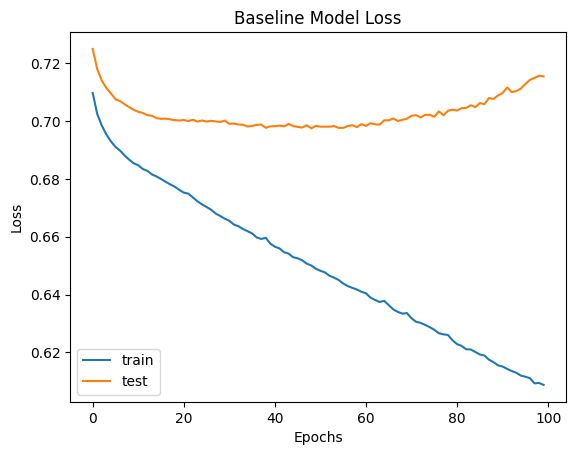

In [5]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Baseline Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
# Step 4: Implement solutions for overfitting and underfitting
# Solution 1: Adding Dropout layers
from keras.layers import Dropout


In [7]:
def create_dropout_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))  # Adding dropout
    model.add(Dense(8, activation='relu'))
    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [8]:
# Train the dropout model
dropout_model = create_dropout_model(X_train.shape[1], 1)
dropout_history = dropout_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)


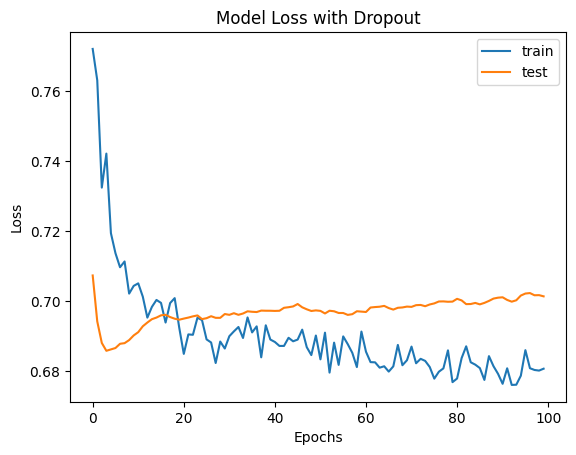

In [9]:
# Plot training and validation loss for dropout model
plt.plot(dropout_history.history['loss'], label='train')
plt.plot(dropout_history.history['val_loss'], label='test')
plt.title('Model Loss with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
# Solution 2: Adding L2 regularization
def create_regularized_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(16, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # Adding L2 regularization
    model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(output_dim, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [11]:
# Train the regularized model
regularized_model = create_regularized_model(X_train.shape[1], 1)
regularized_history = regularized_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)


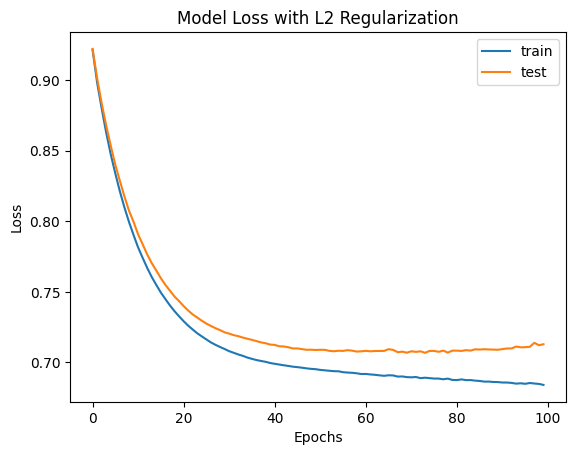

In [12]:
# Plot training and validation loss for regularized model
plt.plot(regularized_history.history['loss'], label='train')
plt.plot(regularized_history.history['val_loss'], label='test')
plt.title('Model Loss with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
